<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Purpose" data-toc-modified-id="Purpose-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Prepare-Data-from-WebAPI" data-toc-modified-id="Prepare-Data-from-WebAPI-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare Data from WebAPI</a></span></li><li><span><a href="#Morphological-Analysis" data-toc-modified-id="Morphological-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Morphological Analysis</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualization</a></span><ul class="toc-item"><li><span><a href="#Generating-WordCloud" data-toc-modified-id="Generating-WordCloud-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Generating WordCloud</a></span></li><li><span><a href="#Features-of-Morphological-Analysis" data-toc-modified-id="Features-of-Morphological-Analysis-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Features of Morphological Analysis</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Purpose

This shows how to handle Japanese with a probable use case.
The use case is to fetch data from WebAPI and to process them, then visualize the results.
So the following will be described.

* Get json data from WebAPI
* Confirm real world responses from WebAPI
* Tokenize Japanese with Morphological Analyzer
* Visualize characteristic words with generating WordCloud and Graph

As a first step, this notebook does not dig down each steps. 

# Prepare Data from WebAPI

In [1]:
import requests

# API Document: https://dev.syosetu.com/man/api/
NAROU_API_URL = "https://api.syosetu.com/novelapi/api"
payload = {'out': "json",
           'lim': 100}

response = requests.get(NAROU_API_URL, payload)

In [2]:
response.json()[:3]

[{'allcount': 677151},
 {'title': 'じゃじゃ馬ピッピの初恋事件簿（天才＋秀才＝バカップル？）',
  'ncode': 'N4228FC',
  'userid': 1305716,
  'writer': '李\u3000熒惑',
  'story': '\u3000私の名は寛永寺理英、九州の北の端っこに住んでいる中学２年生。進級して早々、片思いしてる相手に告白をしたらフラれちゃって、少し落ち込んでたんだ。でも、そのことがきっかけで周りの物事が動き始めたの。それまで単なる同級生としてしか認識してこなかった男の子に強引な告白をされて、断る理由も無かったからつき合ってみたら、これまで退屈で平凡だと思っていた日常が、実はそうでもなかったことに気がついたの。それは、今まで物事を深く洞察してこなかったことで知らなかったことや、周囲の大人たちの努力で知らずに済んでいたことで、徐々に私の目にも入るようになって来たんだ。それは彼と付き合い始めたことで、自分の視野が広がったのか、それとも違う視点から物事を見ることができるようになったからなのか、は分からないんだけど・・・でも、そのせいで次々といろんな事件や事故に遭遇することも多くなったわ。それに伴って、不愉快な出来事に遭遇してそれを解決したり、不思議に思ったことを解き明かしたりもしてきたの。これは、そんな私が中学２年生として過ごした１年間の記録です。',
  'biggenre': 3,
  'genre': 304,
  'gensaku': '',
  'keyword': 'スクールラブ ミステリー サスペンス 青春ミステリー 歴史ミステリー 暗号ミステリー',
  'general_firstup': '2018-11-03 14:17:47',
  'general_lastup': '2019-09-01 18:26:03',
  'novel_type': 1,
  'end': 1,
  'general_all_no': 8,
  'length': 177637,
  'time': 356,
  'isstop': 0,
  'isr15': 0,
  'isbl': 0,
  'isgl': 0,
  'iszankoku': 0,
  'istensei': 0,
  'i

In [3]:
texts = [novel['story'] for novel in response.json()[1:]]

Check converted data. It contains \u3000 but do not be worried. \u3000 represents a full-width space.
The following helps to understand this meaning.

In [4]:
texts[:2]

['\u3000私の名は寛永寺理英、九州の北の端っこに住んでいる中学２年生。進級して早々、片思いしてる相手に告白をしたらフラれちゃって、少し落ち込んでたんだ。でも、そのことがきっかけで周りの物事が動き始めたの。それまで単なる同級生としてしか認識してこなかった男の子に強引な告白をされて、断る理由も無かったからつき合ってみたら、これまで退屈で平凡だと思っていた日常が、実はそうでもなかったことに気がついたの。それは、今まで物事を深く洞察してこなかったことで知らなかったことや、周囲の大人たちの努力で知らずに済んでいたことで、徐々に私の目にも入るようになって来たんだ。それは彼と付き合い始めたことで、自分の視野が広がったのか、それとも違う視点から物事を見ることができるようになったからなのか、は分からないんだけど・・・でも、そのせいで次々といろんな事件や事故に遭遇することも多くなったわ。それに伴って、不愉快な出来事に遭遇してそれを解決したり、不思議に思ったことを解き明かしたりもしてきたの。これは、そんな私が中学２年生として過ごした１年間の記録です。',
 '40手前のおっさんが過去を行き来し敵と闘うッ！！そんな感じの小説。処女作なので広い心で、温かい目で見てください。\nよろしくお願いします。\nこの作品はpixivでも投稿しております。アカウントは「コタツ虫」、作品名は同じです。']

In [5]:
[text for text in texts if "　" in text][:2]

['\u3000私の名は寛永寺理英、九州の北の端っこに住んでいる中学２年生。進級して早々、片思いしてる相手に告白をしたらフラれちゃって、少し落ち込んでたんだ。でも、そのことがきっかけで周りの物事が動き始めたの。それまで単なる同級生としてしか認識してこなかった男の子に強引な告白をされて、断る理由も無かったからつき合ってみたら、これまで退屈で平凡だと思っていた日常が、実はそうでもなかったことに気がついたの。それは、今まで物事を深く洞察してこなかったことで知らなかったことや、周囲の大人たちの努力で知らずに済んでいたことで、徐々に私の目にも入るようになって来たんだ。それは彼と付き合い始めたことで、自分の視野が広がったのか、それとも違う視点から物事を見ることができるようになったからなのか、は分からないんだけど・・・でも、そのせいで次々といろんな事件や事故に遭遇することも多くなったわ。それに伴って、不愉快な出来事に遭遇してそれを解決したり、不思議に思ったことを解き明かしたりもしてきたの。これは、そんな私が中学２年生として過ごした１年間の記録です。',
 '\u3000田中二郎は前世の記憶を持って異世界ヴィーボルグに転生する。\n\n\u3000ヴィーボルグは魔物が跋扈し、常に戦乱の絶えない波乱の世界であり、魔法のような特別な力を使うには生まれつき持ったスキルが必要な世界であった。\n\n\u3000そんなハードな世界に転生した田中二郎だが、転生時に神のガイダンスはなく、与えられたスキルも&quot;最弱&quot;の魔物であるスライムを使役するハズレスキルのみ。\n\u3000さらには孤児院からスタートというハードモード。\n\u3000その孤児院の土地も高利貸しに狙われ、幼くして奴隷へと落ちる。\n\n\u3000そんな田中二郎が世界最強の魔導師となるまでの話。']

In [6]:
[text for text in texts if "u3000" in text][:2]

[]

Here in above, there is no problem about \u3000. And this \u3000 will be removed by Morphological Analysis. 

# Morphological Analysis

Morphological Analysis is a way of tokenizing Japanese Language. 
https://en.wikipedia.org/wiki/Morphological_analysis_(problem-solving)
Not only Japanese language, but also languages which have no word divider.

In this notebook, I'll use `janome` which is a Japanese Morphological Analysis for python.
`Mecab` provided by Kyoto University is used as the conventional method of Tokenizing Japanese.
But Mecab is a bit hard to prepare and to use for beginner of engineer, so an alternative way, I propose a pure python library, `janome`. `janome` does not require to install your pc like Mecab.

In [7]:
from janome.tokenizer import Tokenizer
from janome.analyzer import Analyzer
from janome.tokenfilter import POSKeepFilter
from janome.tokenfilter import CompoundNounFilter
from janome.tokenfilter import LowerCaseFilter


tokenizer = Tokenizer()
token_filters = [CompoundNounFilter(), POSKeepFilter(["名詞"]),
                 LowerCaseFilter()]
analyzer = Analyzer(tokenizer=tokenizer, token_filters=token_filters)

def analyze(analyzer: Analyzer, text: str):
    return [(x.surface, x.part_of_speech) for x in analyzer.analyze(text)]


from functools import partial

custom_analyze = partial(analyze, analyzer)

In [8]:
custom_analyze('大変!\u3000ts聖女')

[('大変!\u3000ts聖女', '名詞,複合,*,*')]

This is an unexpected result. We want to remove full-space, \u3000.
So we need `UnicodeNormalizeCharFilter`.
Let's redefine the analyzer with using `UnicodeNormalizeCharFilter`.

In [9]:
from janome.charfilter import UnicodeNormalizeCharFilter


tokenizer = Tokenizer()
char_filters = [UnicodeNormalizeCharFilter()]
token_filters = [CompoundNounFilter(), POSKeepFilter(["名詞"]),
                 LowerCaseFilter()]

analyzer = Analyzer(tokenizer=tokenizer, char_filters=char_filters, token_filters=token_filters)


def analyze(analyzer: Analyzer, text: str):
    return [(x.surface, x.part_of_speech) for x in analyzer.analyze(text)]

In [10]:
from functools import partial

custom_analyze = partial(analyze, analyzer)

In [11]:
custom_analyze('大変!\u3000ts聖女')

[('大変!', '名詞,複合,*,*'), ('ts聖女', '名詞,複合,*,*')]

Ok, this is a good result we expected.

In [12]:
tokenized_texts = list(map(custom_analyze, texts))

Then, we got pairs of a surface and a part of speech each novels.
We already define which part of speech should be described. 
So a part of speech only `名詞` remains.

In [13]:
tokenized_texts[:5]

[[('私', '名詞,代名詞,一般,*'),
  ('名', '名詞,一般,*,*'),
  ('寛永寺理英', '名詞,複合,*,*'),
  ('九州', '名詞,固有名詞,地域,一般'),
  ('北', '名詞,一般,*,*'),
  ('端っこ', '名詞,一般,*,*'),
  ('中学2年生', '名詞,複合,*,*'),
  ('進級', '名詞,サ変接続,*,*'),
  ('片思い', '名詞,サ変接続,*,*'),
  ('相手', '名詞,一般,*,*'),
  ('告白', '名詞,サ変接続,*,*'),
  ('フラ', '名詞,一般,*,*'),
  ('たん', '名詞,一般,*,*'),
  ('こと', '名詞,非自立,一般,*'),
  ('きっかけ', '名詞,一般,*,*'),
  ('周り', '名詞,一般,*,*'),
  ('物事', '名詞,一般,*,*'),
  ('それ', '名詞,代名詞,一般,*'),
  ('同級生', '名詞,一般,*,*'),
  ('認識', '名詞,サ変接続,*,*'),
  ('男の子', '名詞,一般,*,*'),
  ('強引', '名詞,形容動詞語幹,*,*'),
  ('告白', '名詞,サ変接続,*,*'),
  ('理由', '名詞,一般,*,*'),
  ('これ', '名詞,代名詞,一般,*'),
  ('退屈', '名詞,サ変接続,*,*'),
  ('平凡', '名詞,形容動詞語幹,*,*'),
  ('日常', '名詞,一般,*,*'),
  ('こと', '名詞,非自立,一般,*'),
  ('それ', '名詞,代名詞,一般,*'),
  ('今', '名詞,副詞可能,*,*'),
  ('物事', '名詞,一般,*,*'),
  ('洞察', '名詞,サ変接続,*,*'),
  ('こと', '名詞,非自立,一般,*'),
  ('こと', '名詞,非自立,一般,*'),
  ('周囲', '名詞,一般,*,*'),
  ('大人たち', '名詞,複合,*,*'),
  ('努力', '名詞,サ変接続,*,*'),
  ('こと', '名詞,非自立,一般,*'),
  ('私', '名詞,代名詞,一般,*'),
  ('目', '名詞,一般,*,*'),

Next we flatten the list to make it easy to handle them.

In [14]:
from itertools import chain


chain.from_iterable(tokenized_texts)
words = list(chain.from_iterable(tokenized_texts))

In [15]:
words[:10]

[('私', '名詞,代名詞,一般,*'),
 ('名', '名詞,一般,*,*'),
 ('寛永寺理英', '名詞,複合,*,*'),
 ('九州', '名詞,固有名詞,地域,一般'),
 ('北', '名詞,一般,*,*'),
 ('端っこ', '名詞,一般,*,*'),
 ('中学2年生', '名詞,複合,*,*'),
 ('進級', '名詞,サ変接続,*,*'),
 ('片思い', '名詞,サ変接続,*,*'),
 ('相手', '名詞,一般,*,*')]

And now, there should be no spaces, \u3000. Let's check it.

In [16]:
[surface for surface, _ in words if "　" in surface]

[]

In [17]:
[surface for surface, _ in words if "人" in surface][:10]

['大人たち', '人間', '人生', '人々', '人生', '人生', '人生', '登場人物それぞれ', '主人公', '人々']

The next chapter, we will visualize words with WordCloud and matplotlib.
So, we convert data like below.

In [18]:
# instead of TokenCounterFilter, collections.Counter can be used
# https://mocobeta.github.io/janome/#analyzer-v0-3-5
from collections import Counter
surface_counter = Counter(x[0] for x in words)

# Visualization

## Generating WordCloud

We already learn how to fetch data from webAPI and to process data with Morphological Analysis.
In this section, we will learn how to visualize the results.
The first visualization is a wordcloud, the second visualization is a graph of features of words.

In [19]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
# %matplotlib inline

wordcloud = WordCloud(width=800, height=400,
                      font_path="/System/Library/Fonts/Hiragino Sans GB.ttc")

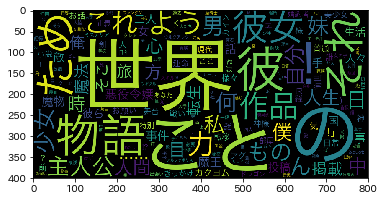

In [20]:
plt.imshow(wordcloud.generate_from_frequencies(surface_counter))

## Features of Morphological Analysis

[('世界', 98),
 ('の', 81),
 ('こと', 75),
 ('!', 43),
 ('彼', 34),
 ('物語', 28),
 ('それ', 27),
 ('ため', 26),
 ('彼女', 26),
 ('作品', 24)]

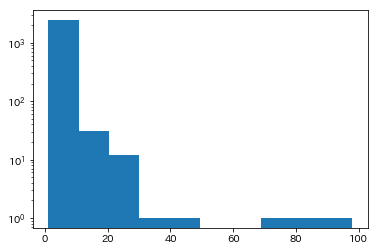

In [21]:
num_of_bins = 10
plt.hist(surface_counter.values(), log=True, bins=num_of_bins)
surface_counter.most_common(10)

<BarContainer object of 10 artists>

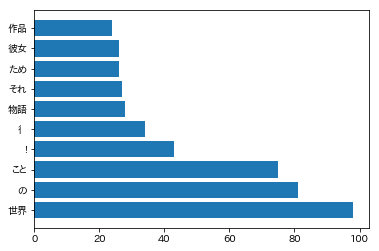

In [22]:
surfaces, frequencies = zip(*surface_counter.most_common(10))
plt.barh(surfaces, frequencies)

<BarContainer object of 10 artists>

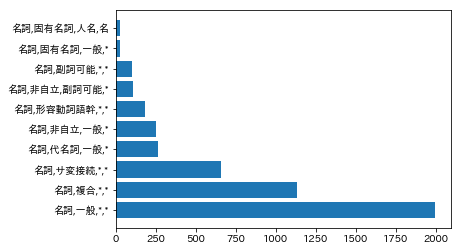

In [23]:
part_of_speech_counter = Counter(x[1] for x in words)
part_of_speeches, frequencies = zip(*part_of_speech_counter.most_common(10))
plt.barh(part_of_speeches, frequencies)

# Conclusion

We roughly learn Japanese NLP with a use case. At first, we learn how to fetch novels data. The second, hot to tokenize Japanese. The last, visualization with the results.  

I did not explain details. For example in improving NLP, prepare stopwords list, or using TF-IDF as stopwords and so on.


So next notebook will focus on fetch data from narou-api.
Narou-api does not support cursor and so on. It means it makes difficult to fetch entire data. It needs to change many detailed queries to fetch entire data properly.  (narou-api at 2019-08-18)

